# Ch 9 - Unsupervised Learning Techniques

This notebook contains the code for Ch 9; see the notes on GitHub for more details.

## K-Means Clustering

To start, we will create some artifical cluster data, and then use the k-means algorithm to attempt to define the clusters.

In [2]:
from sklearn.datasets import make_blobs

In [17]:
import numpy as np
np.random.seed(42)

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [18]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [8]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

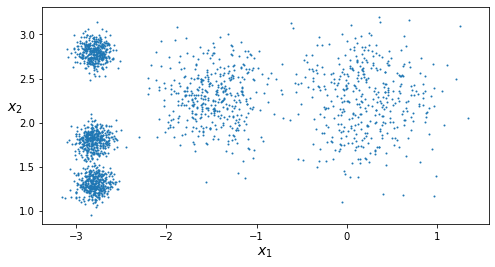

In [19]:
plt.figure(figsize=(8, 4))
plot_clusters(X)

Now that we have our data, let's implement the k-means clustering algorithm!

In [10]:
from sklearn.cluster import KMeans

In [11]:
k = 5
kmeans = KMeans(n_clusters=k)

In [22]:
y_pred = kmeans.fit_predict(X)

By doing this, the k-means algorithm has identified for us five clusters. Each cluster can be identified by its **centroid**:

In [23]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348]])

Since we have specified SKL to look for five clusters, each instance has been assigned to one of these five clusters, which are denoted as 0,1,2,3,4:

In [25]:
y_pred[:10]

array([0, 3, 1, 3, 3, 0, 3, 3, 4, 3])

This means the first instance was assigned to belong in the first cluster (the one with centroid $(-2.80, 1.30)$), the second instance was assigned to the fourth cluster (the one with centroid $(-2.80, 1.80)$), and so on.

In [26]:
kmeans.labels_

array([0, 3, 1, ..., 2, 1, 3])

We note that these assignments are called **labels**, but not in the sense of having a labelled data set!